<a href="https://colab.research.google.com/github/CesarAlejandroSoto/Arquitectura-de-Computadores/blob/main/Fase2_ProyectoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === Librerías básicas ===
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# === Modelos y métricas ===
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
import os
import kagglehub

# Descargar el dataset desde Kaggle
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")
print("Path to dataset files:", path)

# Ver las subcarpetas
print("Subcarpetas dentro del dataset:", os.listdir(path))

# Entrar a la carpeta principal del dataset
dataset_base_path = os.path.join(path, "plantvillage dataset")

# Entrar a la carpeta de imágenes a color (la más usada)
dataset_path = os.path.join(dataset_base_path, "color")
print("Carpetas dentro de /color:", os.listdir(dataset_path))

# ✅ Filtramos solo las carpetas de maíz
maize_classes = [d for d in os.listdir(dataset_path) if "Corn" in d]
print("\nClases de maíz disponibles:", maize_classes)

Using Colab cache for faster access to the 'plantvillage-dataset' dataset.
Path to dataset files: /kaggle/input/plantvillage-dataset
Subcarpetas dentro del dataset: ['plantvillage dataset']
Carpetas dentro de /color: ['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'A

In [ ]:
import os
import kagglehub

# Descargar el dataset desde Kaggle
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

# Entrar a la carpeta principal del dataset
dataset_base_path = os.path.join(path, "plantvillage dataset")

# Entrar a la carpeta de imágenes a color (la más usada)
dataset_path = os.path.join(dataset_base_path, "color")

# @title Cargar imágenes y crear las features
# Only the maize classes
classes = [d for d in os.listdir(dataset_path) if "Corn" in d]

data = []

for label in classes:
    folder = os.path.join(dataset_path, label)
    for file in tqdm(os.listdir(folder), desc=f"Cargando {label}"):
        if file.endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(folder, file)
            try:
                img = Image.open(path).resize((64, 64))  # reducimos tamaño
                arr = np.array(img) / 255.0              # normalizamos
                mean = arr.mean(axis=(0,1))              # promedio de color RGB
                std = arr.std(axis=(0,1))                # desviación
                features = np.concatenate([mean, std])   # 6 valores
                data.append([*features, label])
            except:
                continue

columns = ['mean_R','mean_G','mean_B','std_R','std_G','std_B','label']
df = pd.DataFrame(data, columns=columns)

print("Tamaño del dataset:", df.shape)
df.head()

Using Colab cache for faster access to the 'plantvillage-dataset' dataset.


Cargando Corn_(maize)___Northern_Leaf_Blight: 100%|██████████| 985/985 [00:00<00:00, 1302.21it/s]
Cargando Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 100%|██████████| 513/513 [00:00<00:00, 1452.63it/s]
Cargando Corn_(maize)___healthy: 100%|██████████| 1162/1162 [00:06<00:00, 180.35it/s]


Tamaño del dataset: (1323, 7)


,mean_R,mean_G,mean_B,std_R,std_G,std_B,label
0,0.502210,0.528818,0.426115,0.114363,0.076793,0.150615,Corn_(maize)___Northern_Leaf_Blight
1,0.448534,0.439893,0.381655,0.136161,0.110765,0.100623,Corn_(maize)___Northern_Leaf_Blight
2,0.527868,0.499779,0.348609,0.115540,0.087510,0.153939,Corn_(maize)___Northern_Leaf_Blight
3,0.428174,0.498605,0.416699,0.090491,0.090606,0.098829,Corn_(maize)___Northern_Leaf_Blight
4,0.492857,0.471005,0.399560,0.089308,0.055628,0.148995,Corn_(maize)___Northern_Leaf_Blight


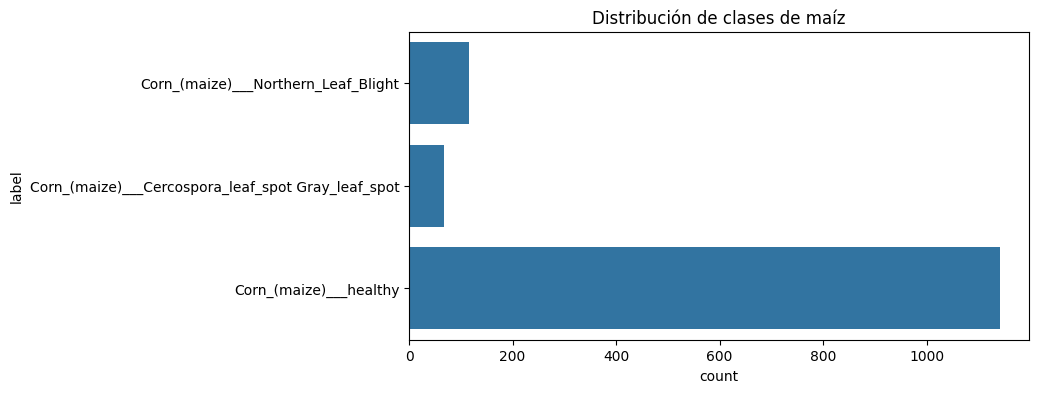

,count,mean,std,min,25%,50%,75%,max
mean_R,1323.0,0.498215,0.108304,0.126799,0.425377,0.497807,0.577372,0.781010
mean_G,1323.0,0.618733,0.108541,0.246132,0.539629,0.638182,0.703077,0.856813
mean_B,1323.0,0.464228,0.118494,0.095369,0.387292,0.468985,0.552966,0.771378
std_R,1323.0,0.134231,0.038339,0.036822,0.107277,0.130652,0.155158,0.295759
std_G,1323.0,0.112034,0.037622,0.032866,0.084196,0.105289,0.133684,0.254155
std_B,1323.0,0.144241,0.039676,0.033914,0.116615,0.142224,0.170211,0.302457


In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(y='label', data=df)
plt.title("Distribución de clases de maíz")
plt.show()

df.describe().T


In [ ]:
# @title Dividir los datos y estandarizar
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



=== Decision Tree ===
                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.29      0.25      0.27        20
               Corn_(maize)___Northern_Leaf_Blight       0.66      0.71      0.68        35
                            Corn_(maize)___healthy       0.99      0.99      0.99       342

                                          accuracy                           0.92       397
                                         macro avg       0.65      0.65      0.65       397
                                      weighted avg       0.92      0.92      0.92       397


=== Random Forest ===
                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.67      0.20      0.31        20
               Corn_(maize)___Northern_Leaf_Blight       0.78      0.83      0.81        35
                            Co

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


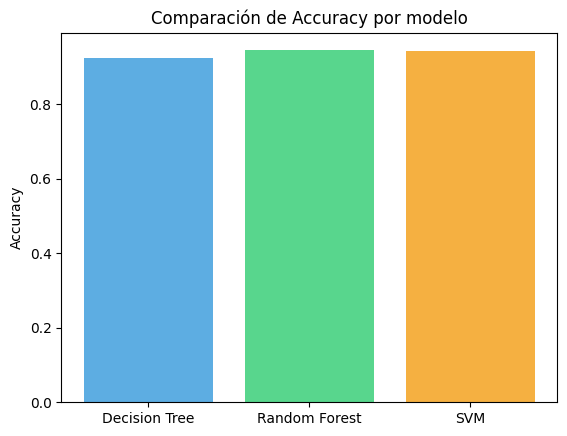

In [ ]:
# @title Entrenar y comparar modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    results[name] = acc

# resumen visual
plt.bar(results.keys(), results.values(), color=['#5DADE2','#58D68D','#F5B041'])
plt.title("Comparación de Accuracy por modelo")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
# @title K-fold y Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    print(f"{name} | Accuracy promedio (5-fold): {scores.mean():.3f} ± {scores.std():.3f}")


Decision Tree | Accuracy promedio (5-fold): 0.941 ± 0.017
Random Forest | Accuracy promedio (5-fold): 0.936 ± 0.015
SVM | Accuracy promedio (5-fold): 0.944 ± 0.015


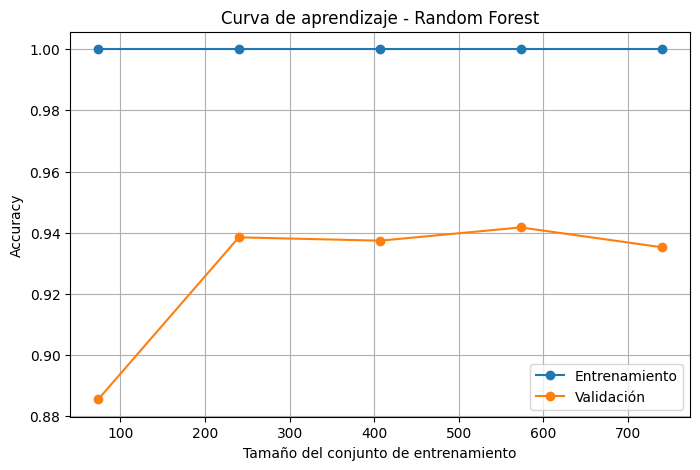

In [ ]:
# @title Curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, val_mean, 'o-', label="Validación")
plt.title("Curva de aprendizaje - Random Forest")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


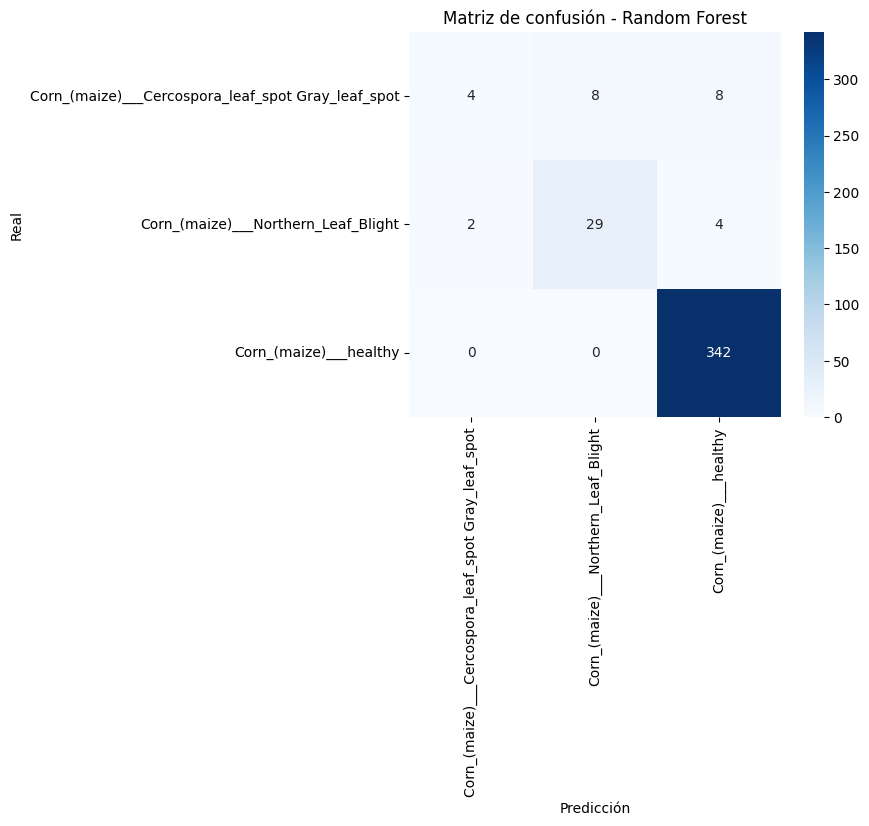

Mejor modelo: Random Forest


In [ ]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title(f"Matriz de confusión - {best_model_name}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

print(f"Mejor modelo: {best_model_name}")
